In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [2]:
df_trace = pd.read_csv('model_results.csv')

In [3]:
df_trace.head()

,datasize,real,model
0,286000.0,1.156777,1.136407
1,205000.0,0.833447,0.848328
2,110000.0,0.517124,0.539460
3,66000.0,0.321763,0.295799
4,178000.0,0.724230,0.703059


In [4]:
df_sorted = df_trace.sort_values(['datasize'], ascending=True)

In [5]:
df_sorted.head()

,datasize,real,model
28,13000.0,0.074400,0.056352
99,14000.0,0.081377,0.062689
159,15000.0,0.076480,0.066386
172,16000.0,0.087617,0.068640
269,19000.0,0.098496,0.099522


In [6]:
datasize = []
real_ls = []
pred_ls = []

# select the 1st 10 samples
count = 0
for index,row in df_sorted.iterrows():
    datasize.append(float(row['datasize']))
    real_ls.append(float(row['real']))
    pred_ls.append(float(row['model']))
    
    count += 1
    if count == 20:
        break

In [7]:
print datasize[0]
print real_ls[0]
print pred_ls[0]

13000.0
0.0744000000001
0.0563519999999


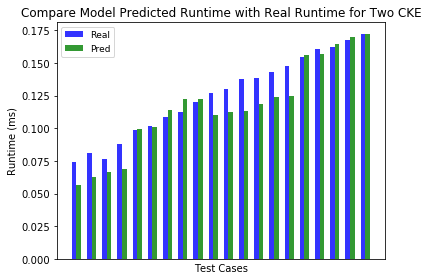

In [14]:
n_groups = len(datasize)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

bar1 = plt.bar(index, real_ls, bar_width, alpha=opacity, color='b', label='Real')
bar2 = plt.bar(index + bar_width, pred_ls, bar_width, alpha=opacity, color='g', label='Pred')

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off


plt.xlabel('Test Cases')
plt.ylabel('Runtime (ms)')
plt.title('Compare Model Predicted Runtime with Real Runtime for Two CKE')

plt.legend(prop={'size':9})
 
plt.tight_layout()
plt.show()

### compute the error rate

In [9]:
df_sorted.head()

,datasize,real,model
28,13000.0,0.074400,0.056352
99,14000.0,0.081377,0.062689
159,15000.0,0.076480,0.066386
172,16000.0,0.087617,0.068640
269,19000.0,0.098496,0.099522


In [10]:
# df_sorted['diff'] = df_sorted['real'] - df_sorted['model']
df_sorted['error'] = abs(df_sorted['real'] - df_sorted['model'] )/ df_sorted['real'] 

In [11]:
df_sorted.head()

,datasize,real,model,error
28,13000.0,0.074400,0.056352,0.242581
99,14000.0,0.081377,0.062689,0.229641
159,15000.0,0.076480,0.066386,0.131989
172,16000.0,0.087617,0.068640,0.216590
269,19000.0,0.098496,0.099522,0.010417


In [12]:
df_sorted['error'].mean()

0.03629811183889702

In [13]:
df_sorted['error'].std()

0.04613767554272399

In [15]:
df_sorted.shape

(285, 4)